In [136]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
df = pd.read_csv('exams.csv')

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [9]:
df.shape

(1000, 8)

In [11]:
#checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
#check for duplicates
df.duplicated().sum()

0

In [15]:
#Get detail about data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [21]:
#Count number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [24]:
#Get statistical detail of data
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [26]:
#From the above description of numerical data,all means are very close to each other- between 66 and 69
#All the standard deviation are also close- between 14.6- 15.19
#While there is a minimum of 0 for maths,other are having 17 and 10 value

In [87]:
#Extract and store values whose data type is 'object'
[feature for feature in df.columns if df[feature].dtype=='O']

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [86]:
#Explore more about data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,test_score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


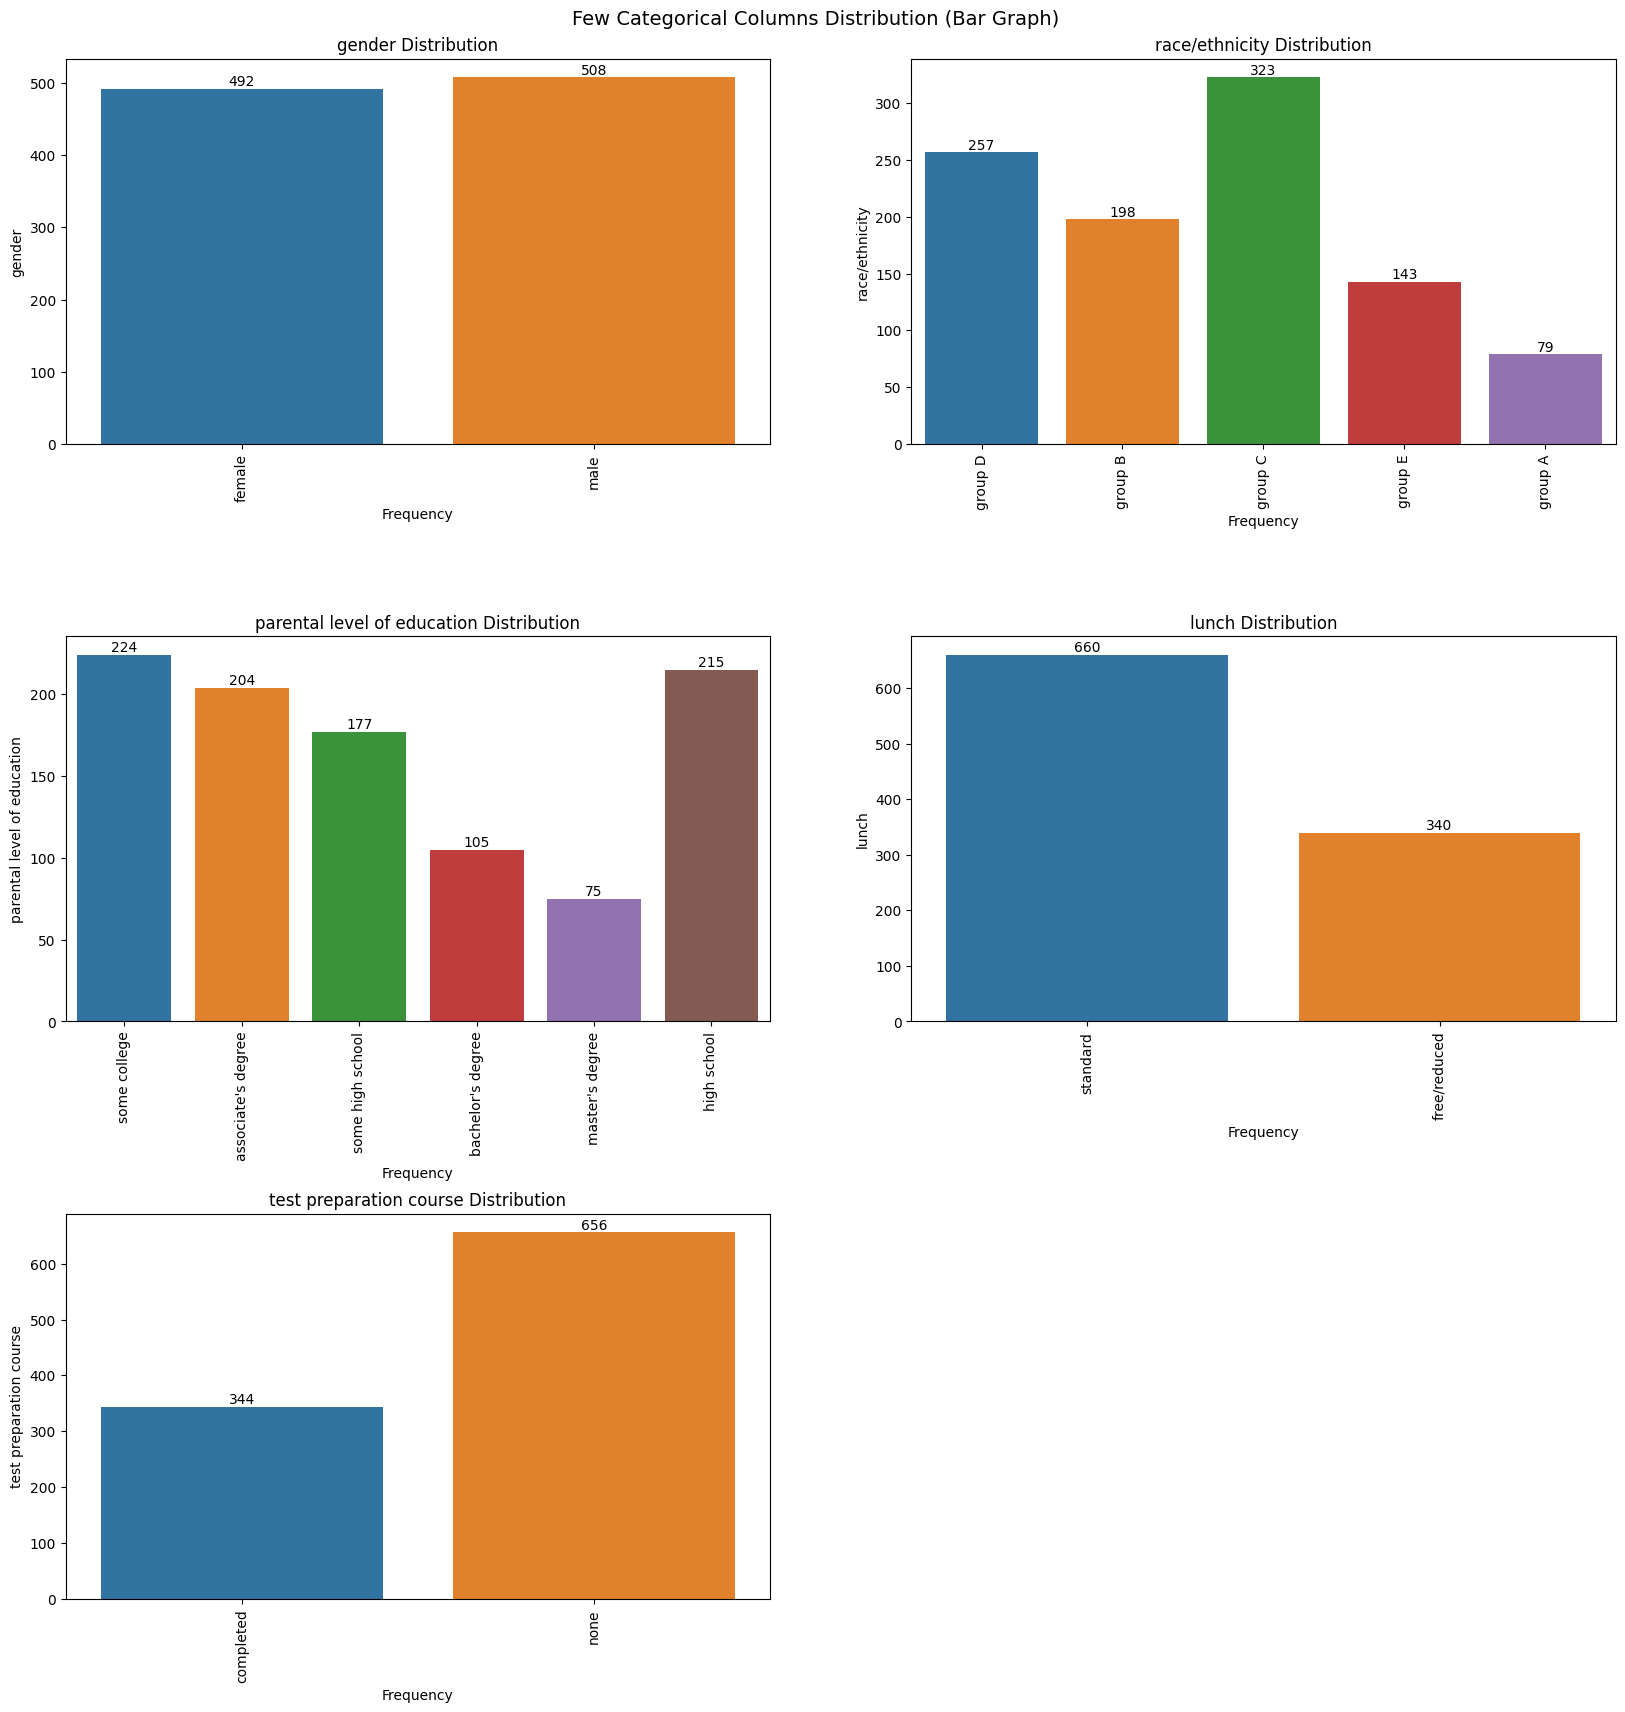

In [106]:
#Bar plot of each column
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    r = i // 2  
    c = i % 2   
    sns.countplot(x=col, data=df, ax=axes[r, c])
    for container in axes[r, c].containers:
        axes[r, c].bar_label(container, label_type="edge")
    axes[r, c].set_ylabel(f"{col}")
    axes[r, c].set_xlabel("Frequency")
    axes[r, c].set_xticklabels(axes[r,c].get_xticklabels(),rotation="vertical")
    axes[r, c].set_title(f"{cat_cols[i]} Distribution")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.9,"Few Categorical Columns Distribution (Bar Graph)", va="center", ha="center", fontsize=14)
plt.show()

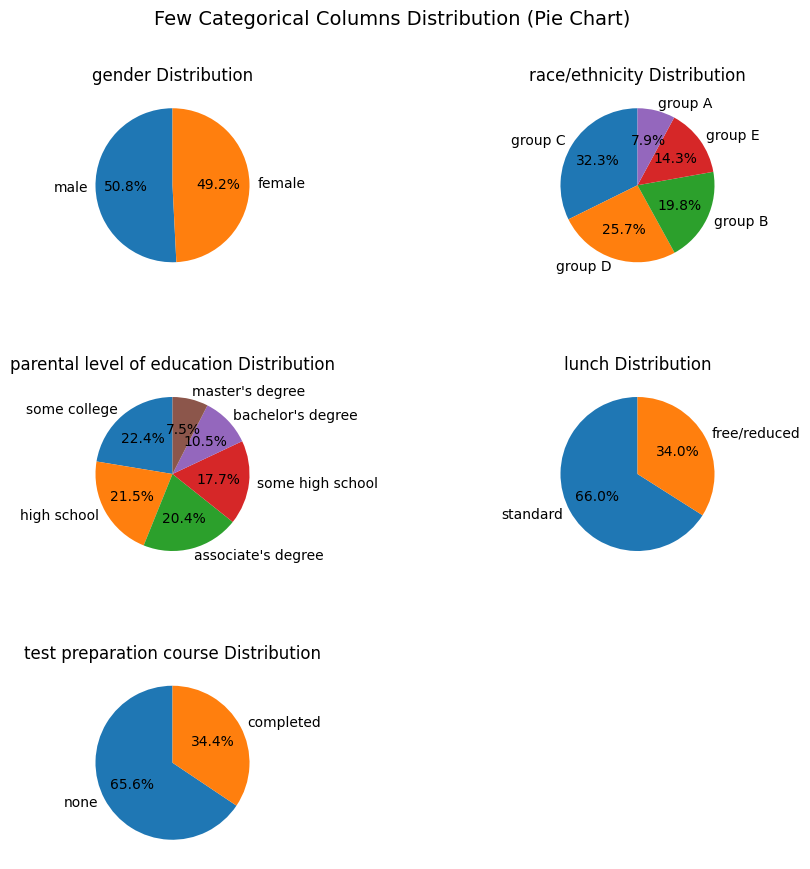

In [109]:
#Pie chart of each column
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    counts = df[col].value_counts()
    axes[r, c].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[r, c].set_title(f"{col} Distribution")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5,0.95,"Few Categorical Columns Distribution (Pie Chart)",va="center", ha="center", fontsize=14)
plt.show()

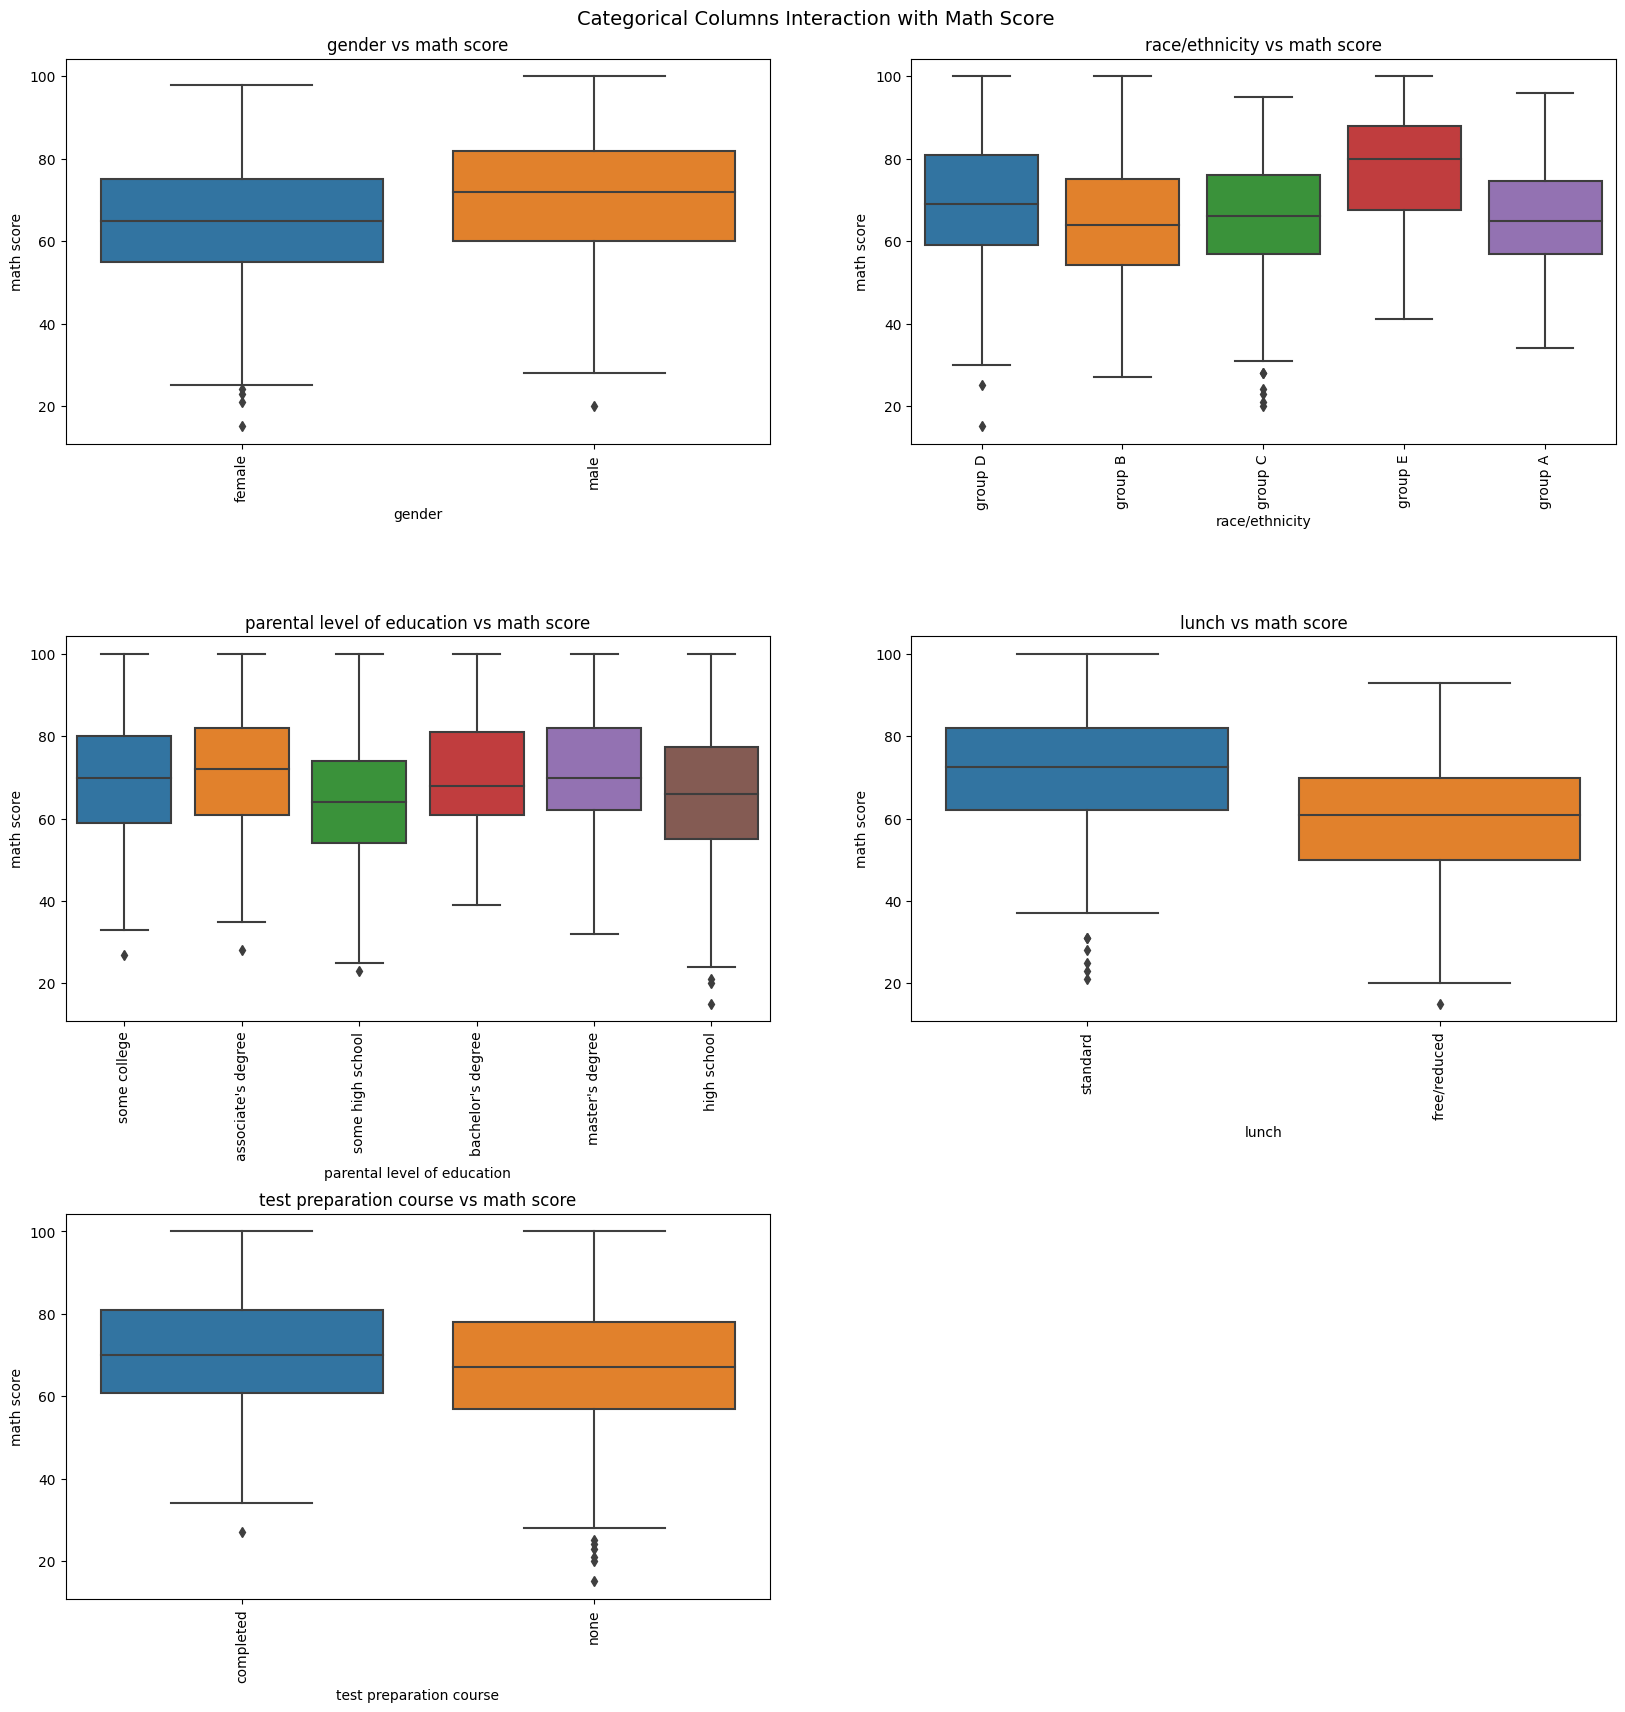

In [110]:
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    r = i // 2  
    c = i % 2   
    sns.boxplot(x=col,y="math score", data=df, ax=axes[r, c])
    for container in axes[r, c].containers:
        axes[r, c].bar_label(container, label_type="edge")
    axes[r, c].set_xlabel(f"{col}")
    axes[r, c].set_ylabel("math score")
    axes[r, c].set_xticklabels(axes[r,c].get_xticklabels(),rotation="vertical")
    axes[r, c].set_title(f"{cat_cols[i]} vs math score")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.9,"Categorical Columns Interaction with Math Score", va="center", ha="center", fontsize=14)
plt.show()

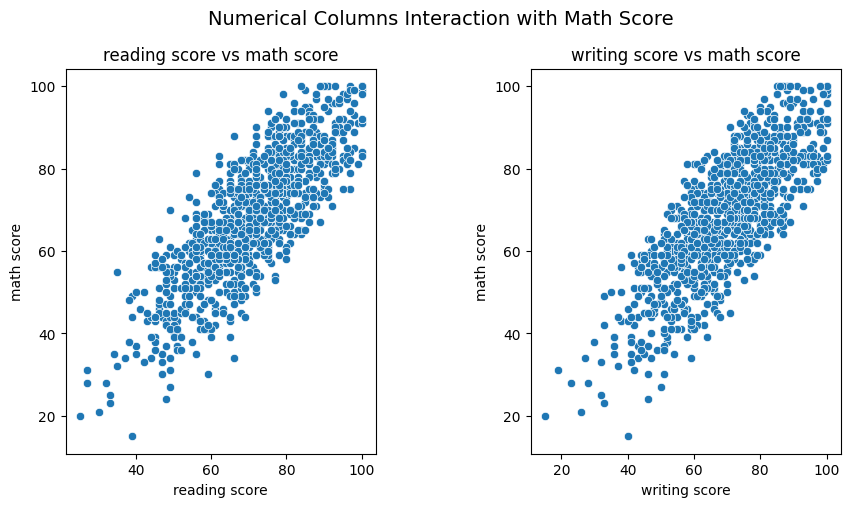

In [113]:
num_cols = ["reading score", "writing score"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, col in enumerate(num_cols):
    sns.scatterplot(x=col, y="math score", data=df, ax=axes[i])
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("math score")
    axes[i].set_title(f"{col} vs math score")

# Remove the problematic line causing the warning
# axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")

plt.subplots_adjust(wspace=0.5)
fig.suptitle("Numerical Columns Interaction with Math Score", va="center", ha="center", fontsize=14)
plt.show()

In [88]:
#Separation of numerical & categorial features
numerical_features = [features for features in df.columns if df[features].dtype!='O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

In [34]:
numerical_features

['math score', 'reading score', 'writing score']

In [37]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [40]:
df['gender'].value_counts()

gender
male      508
female    492
Name: count, dtype: int64

In [42]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64

In [45]:
#Composition (Put a new column named 'test_score' which will be mean of math, reading & writing score
df['test_score'] = df['math score'] + df['reading score'] + df['writing score']

In [47]:
df['average'] = df['test_score']/3

In [50]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,test_score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [53]:
#Maximum score obtained
df['test_score'].max()

300

In [55]:
#Minimum score obtained
df['test_score'].min()

60

<Axes: xlabel='average', ylabel='Count'>

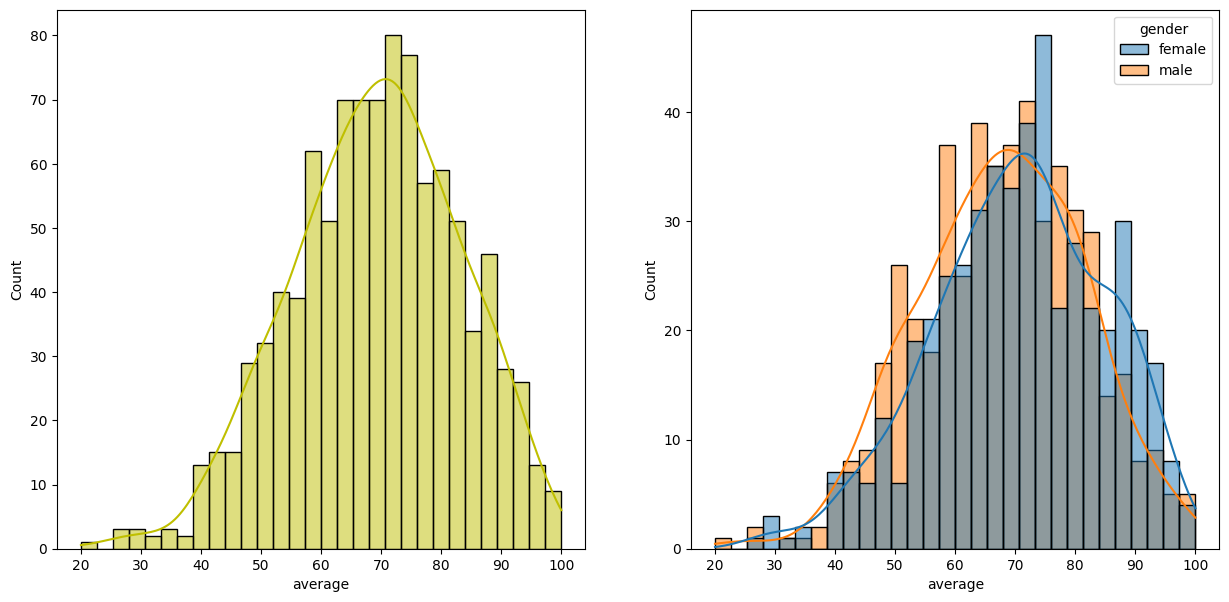

In [59]:
## Explore more visualisation
fig,axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average',bins = 30,kde = True, color = 'y')
plt.subplot(122)
sns.histplot(data = df,x = 'average',bins = 30, kde = True, hue = 'gender')

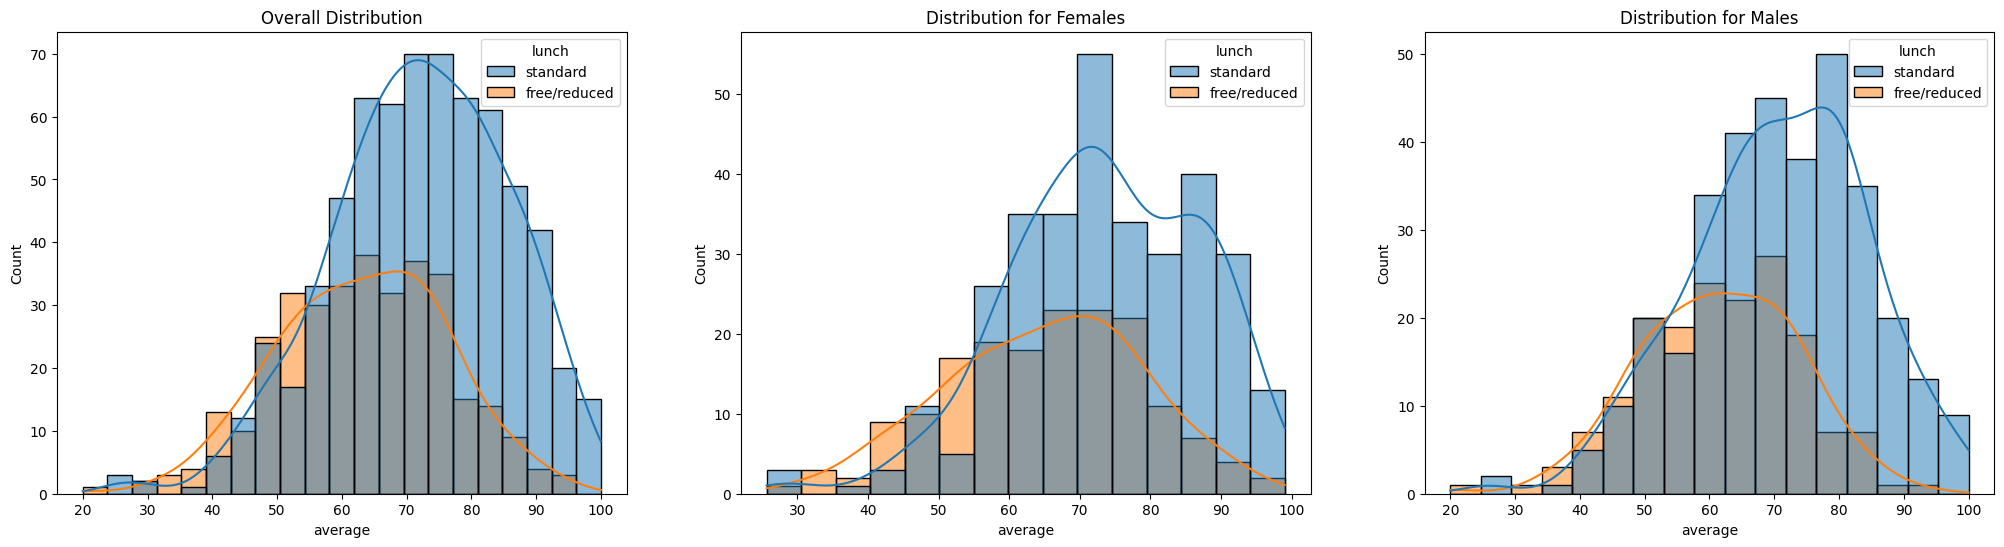

In [70]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Overall Distribution')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.title('Distribution for Females')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.title('Distribution for Males')

plt.show()

<Axes: xlabel='average', ylabel='Count'>

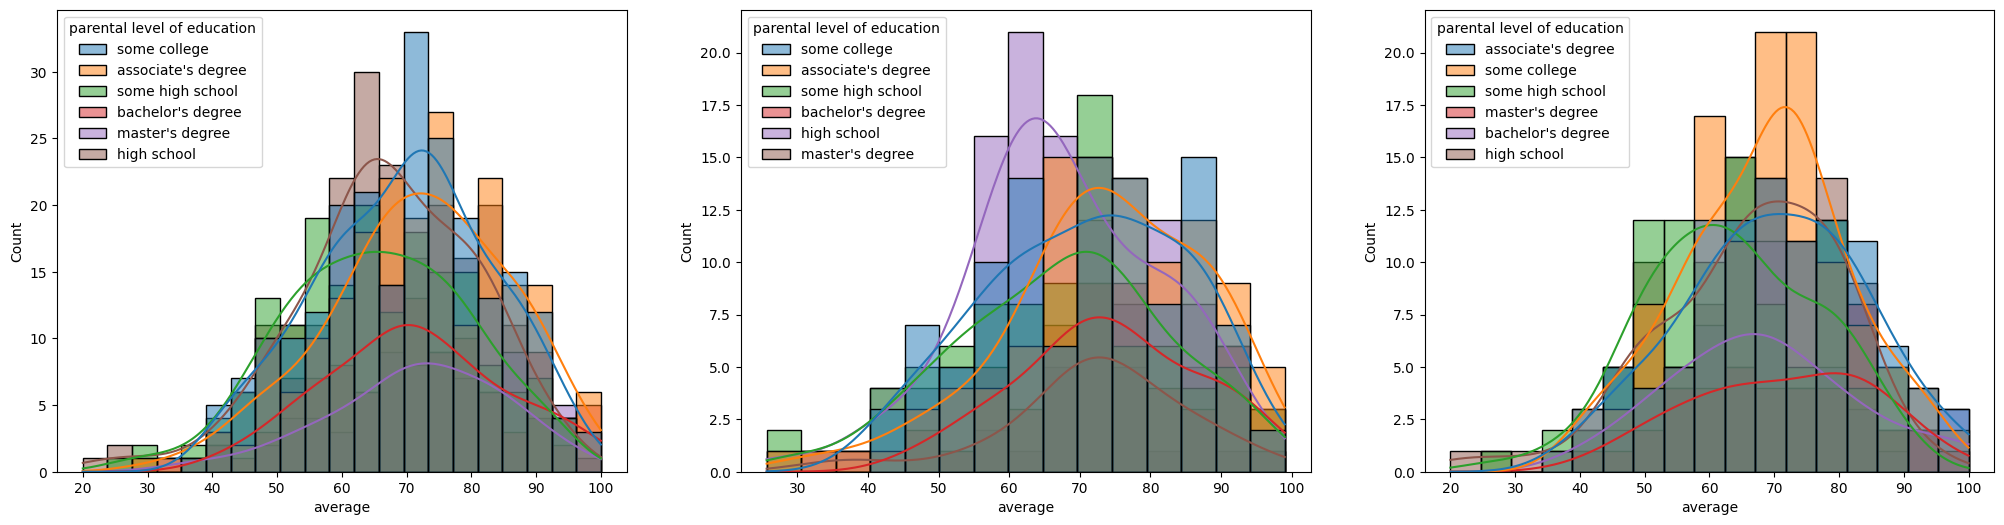

In [82]:
#Kernel density estimate of parent education level of male and female
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

In [74]:
#In general parent's education don't help student perform well in exam.
#3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
#2nd plot we can see there is no effect of parent's education on female students.

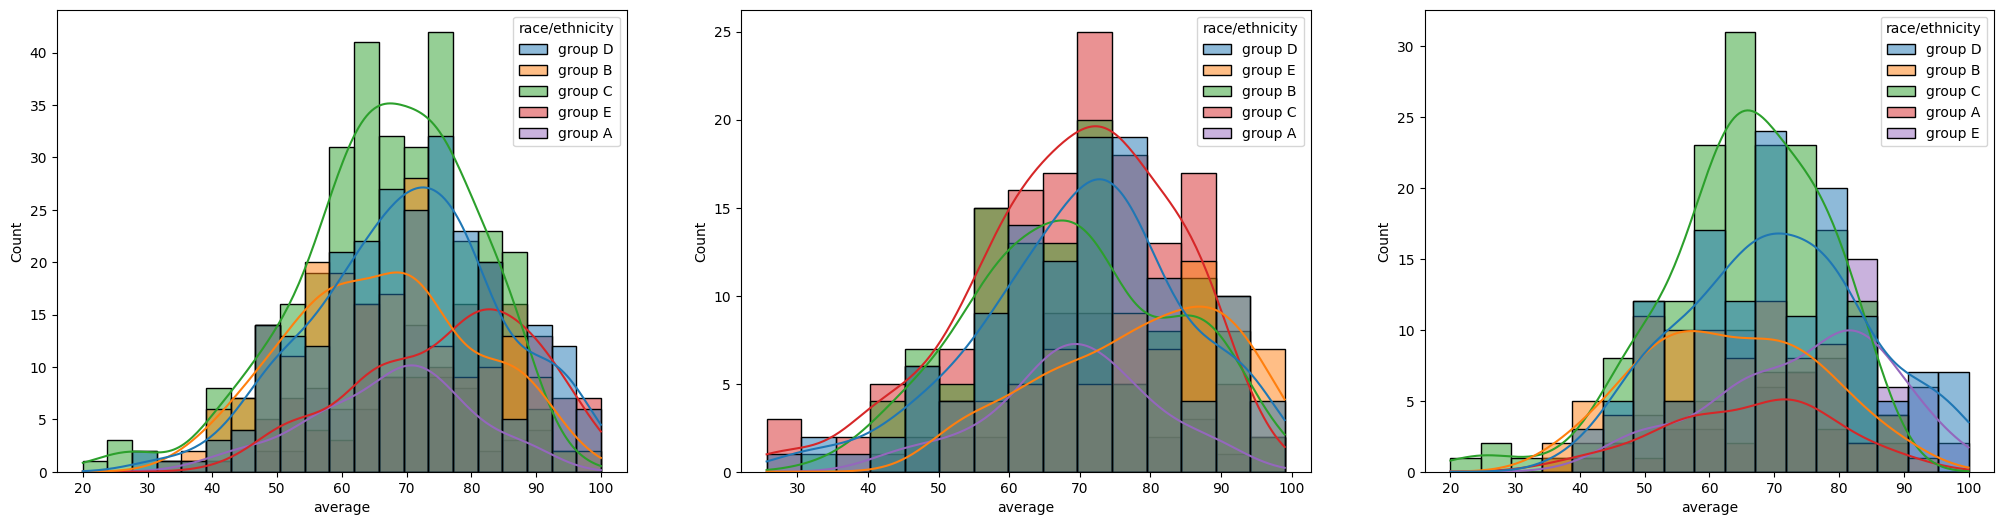

In [81]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')


In [114]:
#Students of group A and group B tends to perform poorly in exam.
#Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [123]:
#Label Encoding
label_encoders={}
for col in cat_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

print("Label Encoding the category columns:")
display(df.head())

print("\nEncoding details:")
for column, encoder in label_encoders.items():
    print(f"{column} Label Encoder Classes: {encoder.classes_}")

Label Encoding the category columns:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,test_score,average
0,0,3,4,1,0,59,70,78,207,69.000000
1,1,3,0,1,1,96,93,87,276,92.000000
2,0,3,4,0,1,57,76,77,210,70.000000
3,1,1,4,0,1,70,70,63,203,67.666667
4,0,3,0,1,1,83,85,86,254,84.666667



Encoding details:
gender Label Encoder Classes: [0 1]
race/ethnicity Label Encoder Classes: [0 1 2 3 4]
parental level of education Label Encoder Classes: [0 1 2 3 4 5]
lunch Label Encoder Classes: [0 1]
test preparation course Label Encoder Classes: [0 1]


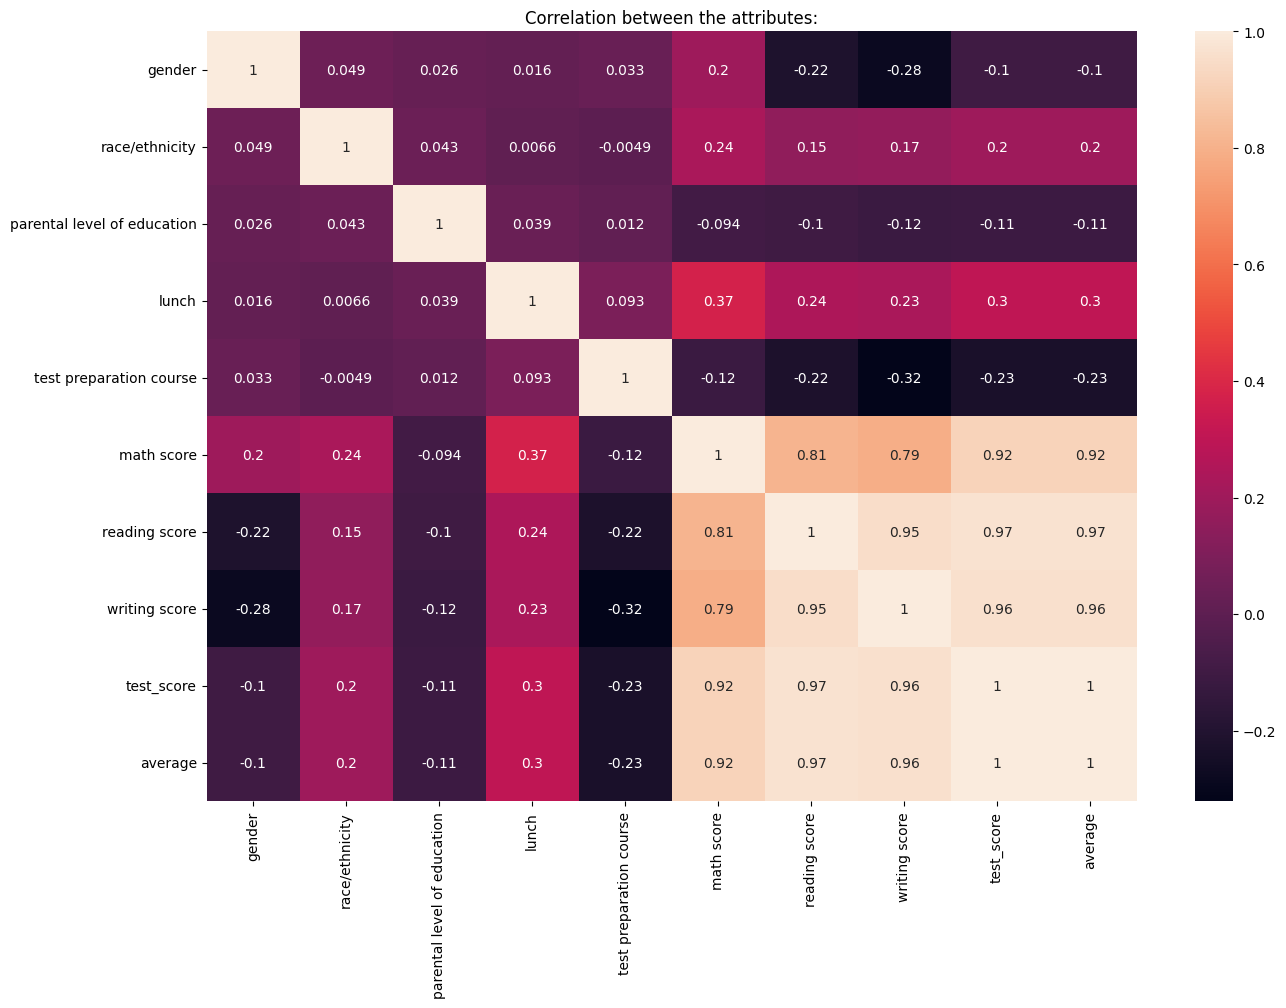

In [127]:
#Display correlation (how weak or strong relation exist b/w entities) 
plt.figure(figsize=(15,10))
plt.title('Correlation between the attributes:')
sns.heatmap(df.corr(),annot=True)
plt.show()

In [153]:
#Store columns for target, x = input, y = output
df = df.drop("test_score",axis = 1)
df = df.drop("average",axis = 1)

y=df["math score"]
x=df.drop("math score", axis=1)

print("Input variables:")
display(x)
print()
print("Output:")
display(y)

Input variables:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,3,4,1,0,70,78
1,1,3,0,1,1,93,87
2,0,3,4,0,1,76,77
3,1,1,4,0,1,70,63
4,0,3,0,1,1,85,86
...,...,...,...,...,...,...,...
995,1,2,4,1,1,77,71
996,1,2,4,1,1,66,66
997,0,0,2,1,0,86,86
998,1,4,2,1,1,72,62



Output:


0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [154]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Shapes after train-test split:")
print(f"Training input: {x_train.shape}")
print(f"Testing input: {x_test.shape}")
print(f"Testing output: {y_train.shape}")
print(f"Testing output: {y_test.shape}")

Shapes after train-test split:
Training input: (750, 7)
Testing input: (250, 7)
Testing output: (750,)
Testing output: (250,)


In [155]:
#Ensemble Learning -> Wisdom of the crowd
models=[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), 
        RandomForestRegressor(), ExtraTreesRegressor()]
r2_scores=[]
for model in models:
    print("Model used:")
    display(model)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    r2_scores.append(r2)
    print("\n")
max_r2=max(r2_scores)
print(f"Best R2 Score Recorded: {max_r2}.")
max_idx=r2_scores.index(max_r2)
best_model=models[max_idx]
print(f"Best Model Performance: {best_model}.")

Model used:


LinearRegression()

R2 Score: 0.8740713514754446


Model used:


Lasso()

R2 Score: 0.8063651078389092


Model used:


Ridge()

R2 Score: 0.8739411770651546


Model used:


KNeighborsRegressor()

R2 Score: 0.6415794710588982


Model used:


SVR()

R2 Score: 0.5951172875032489


Model used:


DecisionTreeRegressor()

R2 Score: 0.7167926254776961


Model used:


RandomForestRegressor()

R2 Score: 0.853326482320395


Model used:


ExtraTreesRegressor()

R2 Score: 0.8513720663218832


Best R2 Score Recorded: 0.8740713514754446.
Best Model Performance: LinearRegression().


In [156]:
#Determining best selected model accuracy via other matrices
print(f"Model Evaluation of {best_model}:")
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
print("\nR2 Score:")
print(r2_score(y_test, y_pred))
print("\nMean Absolute Error:")
print(mean_absolute_error(y_test, y_pred))
print("\nMean Squared Error:")
print(mean_squared_error(y_test, y_pred))

Model Evaluation of LinearRegression():

R2 Score:
0.8740713514754446

Mean Absolute Error:
4.296602636419488

Mean Squared Error:
27.207349946015132


In [157]:
label_encoders

{'gender': LabelEncoder(),
 'race/ethnicity': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'lunch': LabelEncoder(),
 'test preparation course': LabelEncoder()}